In [3]:
import utils
import os
import numpy as np
import glob
import cv2
import utils
import pylab as pl
import shutil
import matplotlib.cm as cm
from sklearn.cross_validation import train_test_split
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning, module='.*/ipykernel/.*')
%matplotlib inline

In [4]:
# Also load the non-filtered data for evaluation
_d = np.load('../data/data_128_train.npz')
X_train = _d['X'][:,None,:,:]
Y_train = _d['Y'][:,None,:,:]

In [5]:
_d = np.load('../data/data_128_test.npz')
X_test = _d['X']

/home/julien/kaggle/venv/local/lib/python2.7/site-packages/IPython/core/formatters.py:92: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
/home/julien/kaggle/venv/local/lib/python2.7/site-packages/IPython/core/formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):


<matplotlib.colorbar.Colorbar instance at 0x7f93cee22dd0>

/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


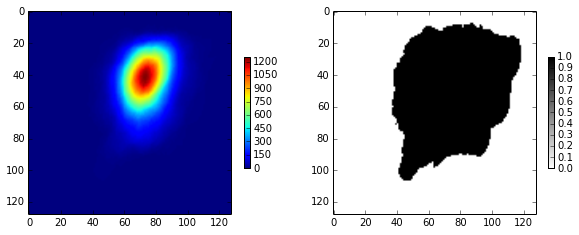

In [6]:
avg_mask = np.sum(Y_train.squeeze(), axis=0)
pl.figure(figsize=(10, 4))
pl.subplot(121)
pl.imshow(avg_mask)
pl.colorbar(shrink=0.5)
pl.subplot(122)
pl.imshow(avg_mask > 3, cmap=cm.binary)
pl.colorbar(shrink=0.5)

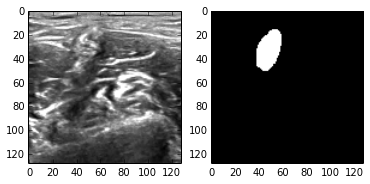

In [27]:
pl.subplot(121)
pl.imshow(X_train[0].squeeze(), cmap=cm.gray)

pl.subplot(122)
pl.imshow(Y_train[0].squeeze(), cmap=cm.gray)

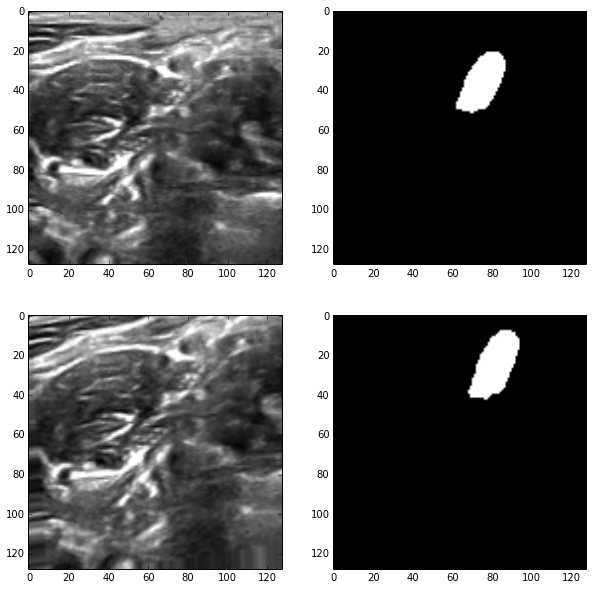

In [136]:
import skimage.transform as sktransf

def rand_float(rng):
    return rng[0] + np.random.random() * (rng[1] - rng[0])

def generate_image(X_img, Y_img, angle_range=None, zoom_range=None, shear_range=None, horiz_shift_range=None,
                   vert_shift_range=None):
    """
    Randomly shift an image by resizing and then random croping
    the resized image
    """
    if angle_range is None:
        angle_range = (-10, 10)
    if zoom_range is None:
        zoom_range = (0.9, 1.1)
    if shear_range is None:
        shear_range = (-5, 5) # shear angle in degrees
    if horiz_shift_range is None:
        horiz_shift_range = (-2, 2)
    if vert_shift_range is None:
        vert_shift_range = (-2, 2)
    inshape = X_img.shape
    
    X2 = X_img
    Y2 = Y_img
    
    # -- random rotation
    angle = np.deg2rad(rand_float(angle_range))
    zoom = rand_float(zoom_range)
    shear = np.deg2rad(rand_float(shear_range))
    horiz_shift = rand_float(horiz_shift_range)
    vert_shift = rand_float(vert_shift_range)
    
    tform = sktransf.AffineTransform(
        scale=(zoom, zoom),
        rotation=angle,
        shear=shear,
        translation=(horiz_shift, vert_shift)
    )
    X2 = sktransf.warp(X2, tform, order=5, mode='edge')
    Y2 = sktransf.warp(Y2, tform, order=1)

    # gaussian noise
    #noise_scale = rand_float((0, 0.1))
    #X2 += np.random.normal(scale=noise_scale, size=X2.shape)
    Y2 = Y2 > 0.5
    return X2, Y2

i = 193
X2, Y2 = generate_image(X_train[i].squeeze(), Y_train[i].squeeze())

pl.figure(figsize=(10,10))
pl.subplot(221)
pl.imshow(X_train[i].squeeze(), cmap=cm.gray)

pl.subplot(222)
pl.imshow(Y_train[i].squeeze(), cmap=cm.gray)

pl.subplot(223)
pl.imshow(X2.squeeze(), cmap=cm.gray)

pl.subplot(224)
pl.imshow(Y2.squeeze(), cmap=cm.gray)